<a href="https://colab.research.google.com/github/18521564/CS114.K21/blob/master/giuaki3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [69]:
data = pd.read_csv('http://cs.uit.edu.vn/data3.txt',names=['Size','Runtime'])
data = pd.DataFrame(data)
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10585    False
10586    False
10587    False
10588    False
10589    False
Length: 10590, dtype: bool

Câu 2: Visualize thử data để chọn model


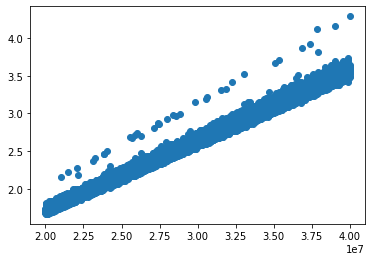

In [70]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.show()

Ta thấy dữ liệu ở câu bộ data mới có độ phân tán lớn hơn dữ liệu data cũ, một số dữ liệu nằm tách biệt khỏi đám dữ liệu gọi là outlier

<ErrorbarContainer object of 3 artists>

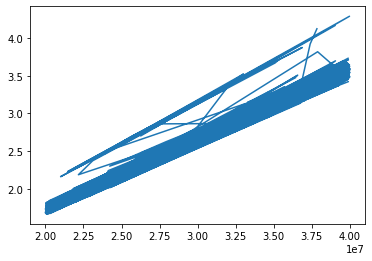

In [71]:
plt.errorbar(data.iloc[:,0],data.iloc[:,1])

Chia tập train và test theo tỉ lệ 80% train 20% test

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,0].values,data.iloc[:,1].values,train_size=0.8)

Training model


In [0]:
from sklearn.linear_model import LinearRegression
it = LinearRegression().fit(x_train[:,np.newaxis],y_train)

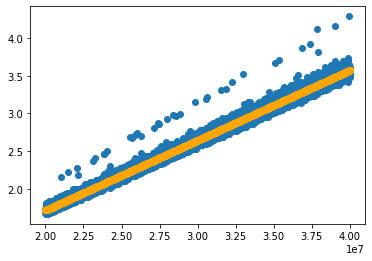

In [74]:
xfit = np.linspace(2*10000000,4*10000000,10000)
yfit = it.predict(xfit[:,np.newaxis])
plt.scatter(data.iloc[:,0],data.iloc[:,1])
plt.scatter(xfit,yfit,color='orange')
plt.show()

ĐÚNG NHƯ DỰ ĐOÁN, r2 SCORE THẤP HƠN KẾT QUẢ CỦA DATA CŨ (99,75) CHỈ CÓ (98,7%)
outlier CỦA DỮ LIỆU ĐÃ ẢNH HƯỞNG ĐẾN KẾT QUẢ


In [75]:
from sklearn.metrics import r2_score
print(r2_score(y_test,it.predict(x_test[:,np.newaxis])))

0.9889045813842648


TĂNG HIỆU SUẤT MODEL BẰNG PHƯƠNG PHÁP ADDING MORE FEATURES:
Thêm một cột nữa là 1/1E7 của cột size

Xử lý bằng phương pháp adding more features
Cụ thể là: thêm một cột nữa là bình phương của cột Size


In [97]:
data['Size2'] = data['Size']/(1e7)
data

,Size,Runtime,Size2
0,37837612,4.12166,3.783761
1,37395246,3.92089,3.739525
2,36610827,3.21540,3.661083
3,29555651,2.54506,2.955565
4,25928216,2.21831,2.592822
...,...,...,...
10585,26872494,2.35117,2.687249
10586,20753811,1.79155,2.075381
10587,33520323,2.90918,3.352032
10588,21243264,1.80292,2.124326


In [120]:
#thay đổi tập train, test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.iloc[:,[0,2]].values,data.iloc[:,1].values,train_size=0.8)
x_train.shape



(8472, 2)

In [0]:
from sklearn.linear_model import LinearRegression
it = LinearRegression().fit(x_train,y_train)

In [101]:
from sklearn.metrics import r2_score
print(r2_score(y_test,it.predict(x_test)))

0.9899229899229564


Cao hơn kết quả gốc:
Giải thích: Vì có thể rút đám outlier lại gần đám mây dữ liệu, làm mất bớt outlier

In [126]:
#ứng dụng dự đoán
n = eval(input('nhap so lan du doan: '))
for i in range(n):
 x = eval(input('nhap size :'))
 arr = np.array([x,x/1e7]).reshape(-1,2)
 print('Timerun:',it.predict(arr))

nhap so lan du doan: 5
nhap size :36012167
Timerun: [3.20060373]
nhap size :20012216
Timerun: [1.71832701]
nhap size :32809510
Timerun: [2.90390132]
nhap size :24871158
Timerun: [2.16847193]
nhap size :37837612
Timerun: [3.36971766]
